Primeiro Notebook - Aprendizado Supervisionado - Classificação

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Carregando os dados e mostrando o seu formato:

In [2]:
my_data = pd.read_csv('diabetes_dataset.csv')
my_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
my_data.shape

(768, 9)

O mapa térmico de correlação é usado para encontrar as relações potenciais entre as variáveis ​​nos dados e para exibir a força dessas relações. Para exibir o mapa de calor, usamos a biblioteca de plotagem <b>seaborn</b>. A glicose é a principal causa de diabetes em pacientes. Neste conjunto de dados, a glicose tem uma alta correlação com o resultado (já era esperado!).

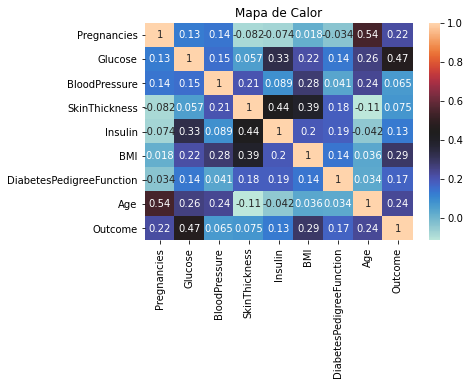

In [4]:
plt.figure()
sns.heatmap(my_data.corr(), annot=True, cmap='icefire').set_title('Mapa de Calor')
plt.show()

Criando numpy ndarrays para valores de entrada e saída:

In [5]:
X_val = my_data.drop('Outcome', axis=1).values
y_val = my_data['Outcome'].values

Dividindo dados em conjunto de treinamento e teste: <br>
Para dividir o conjunto de dados em treinamento e teste, precisamos importar train_test_split() para dividir os dados na proporção necessária. <br>Utilizaremos 80% dos dados para treino e 20% para teste.

In [6]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_val,y_val,test_size=0.2,random_state=40, stratify=y_val)

<b>K-nearest neighbors (KNN)</b> é um algoritmo simples de aprendizado de máquina supervisionado. No KNN, encontramos a semelhança entre os novos dados (caso) e os pontos disponíveis usando a fórmula da distância euclidiana. Para implementar o algoritmo, precisamos importar <b>KNeighborsClassifier()</b>.

In [7]:
from sklearn.neighbors import KNeighborsClassifier

# Criar arrays opara armazenar resultados (acurácia) para conjuntos de treino e teste
my_neighbors = np.arange(1,10) # [1, 2, 3, 4, 5, 6, 7, 8, 9]
train_acc =np.empty(len(my_neighbors))
test_acc = np.empty(len(my_neighbors))

for i,k in enumerate(my_neighbors):
    # Cria um classificador KNN com k vizinhos
    knn_model = KNeighborsClassifier(n_neighbors=k)  

    # treina o modelo (fit)
    knn_model.fit(X_train, y_train)

    # computa acurácia no conjunto de treinamento
    train_acc[i] = knn_model.score(X_train, y_train)

    # computa acurácia no conjunto de teste
    test_acc[i] = knn_model.score(X_test, y_test) 

Agora podemos escolher o melhor valor para K. Faremos de forma gráfica:

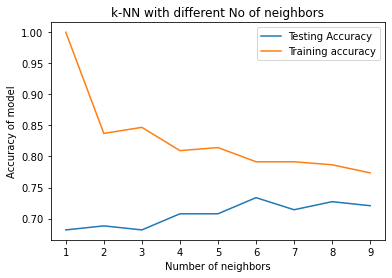

In [8]:
#Generate plot 
plt.title("k-NN with different No of neighbors")
plt.plot(my_neighbors, test_acc, label= "Testing Accuracy")
plt.plot(my_neighbors, train_acc, label= "Training accuracy")
plt.legend()
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy of model")
plt.show()

Do gráfico, é possível verificar que o melhor valor para k é 6 (0.73376623). </br>Como o problema é de classificação (diabetes ou não), a medida "acurácia" é conveniente e representativa.

In [9]:
# Refazer para o melhor resultado
knn_model= KNeighborsClassifier(n_neighbors=6)
knn_model.fit(X_train, y_train)
knn_model.score(X_test,y_test)

0.7337662337662337

Podemos ainda visualizar o desempenho de classificação através da matriz de confusão. Veja:

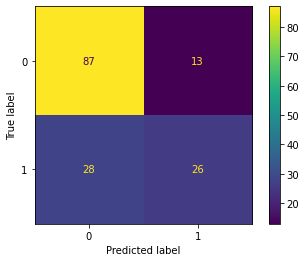

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_prediction = knn_model.predict(X_test)
cm = confusion_matrix(y_test,y_prediction)
ConfusionMatrixDisplay(cm).plot()

E ver um relatório sobre a classificação:

In [11]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81       100
           1       0.67      0.48      0.56        54

    accuracy                           0.73       154
   macro avg       0.71      0.68      0.68       154
weighted avg       0.73      0.73      0.72       154



Isso termina nosso primeiro exemplo! Foi um resultado apenas modesto de classificação (73%)